# Comparison of approximate robustness curves for different sample sizes (1k vs. 10k points)

In [ ]:
import os
os.chdir("../")
import sys
import copy
import json
from argparse import Namespace
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper')

import provable_robustness_max_linear_regions.data as dt
from generate_robustness_curves import generate_curve_data
from utils import NumpyEncoder

## Plot settings:

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text', usetex=True)

# dictionary that maps color string to 'good looking' seaborn colors that are easily distinguishable
colors = {
    "orange": sns.xkcd_rgb["yellowish orange"],
    "red": sns.xkcd_rgb["pale red"],
    "green": sns.xkcd_rgb["medium green"],
    "blue": sns.xkcd_rgb["denim blue"],
    "yellow": sns.xkcd_rgb["amber"],
    "purple": sns.xkcd_rgb["dusty purple"],
    "cyan": sns.xkcd_rgb["cyan"]
}

## Calculate robustness curves:
Estimated runtime (if no file with data is present): 3 days

In [3]:
def load_from_json(file_name):

    if not os.path.exists("res/" + file_name + ".json"):
        return None
    else:
        with open("res/" + file_name + ".json", 'r') as fp:
            loaded_json =  json.load(fp)

            for key in loaded_json.keys():
                loaded_json[key]["x"] = np.array(loaded_json[key]["x"])
                loaded_json[key]["y"] = np.array(loaded_json[key]["y"])

                loaded_json[key]["y"][np.isnan(loaded_json[key]["x"])] = 1.0
                loaded_json[key]["x"] = np.nan_to_num(loaded_json[key]["x"], nan = np.nanmax(loaded_json[key]["x"]))

            return loaded_json
        
def save_to_json(dictionary, file_name):
        
    if not os.path.exists("res"):
        os.makedirs("res")

    with open("res/" + file_name + ".json", 'w') as fp:
        json.dump(dictionary, fp, cls = NumpyEncoder)

n_points = 10000

model_path = "provable_robustness_max_linear_regions/models/mmr+at/provable_robustness_max_linear_regions/models/mmr+at/2019-02-17 01:54:16 dataset=mnist nn_type=cnn_lenet_small p_norm=inf lmbd=0.5 gamma_rb=0.2 gamma_db=0.2 ae_frac=0.5 epoch=100.mat"

robustness_curve_data = dict()
robustness_curve_data = load_from_json("rob_curve_data_MMR+AT_l_inf_n_points={}".format(n_points))

if not robustness_curve_data:

    args = Namespace()

    args.dataset = "mnist"
    args.n_points = n_points
    args.model_path = model_path
    args.nn_type = "cnn"
    args.norms = ["2"]
    args.save = False
    args.plot = False

    robustness_curve_data = generate_curve_data(args)

    save_to_json(robustness_curve_data, "rob_curve_data_MMR+AT_l_inf_n_points={}".format(n_points))


## Plot:

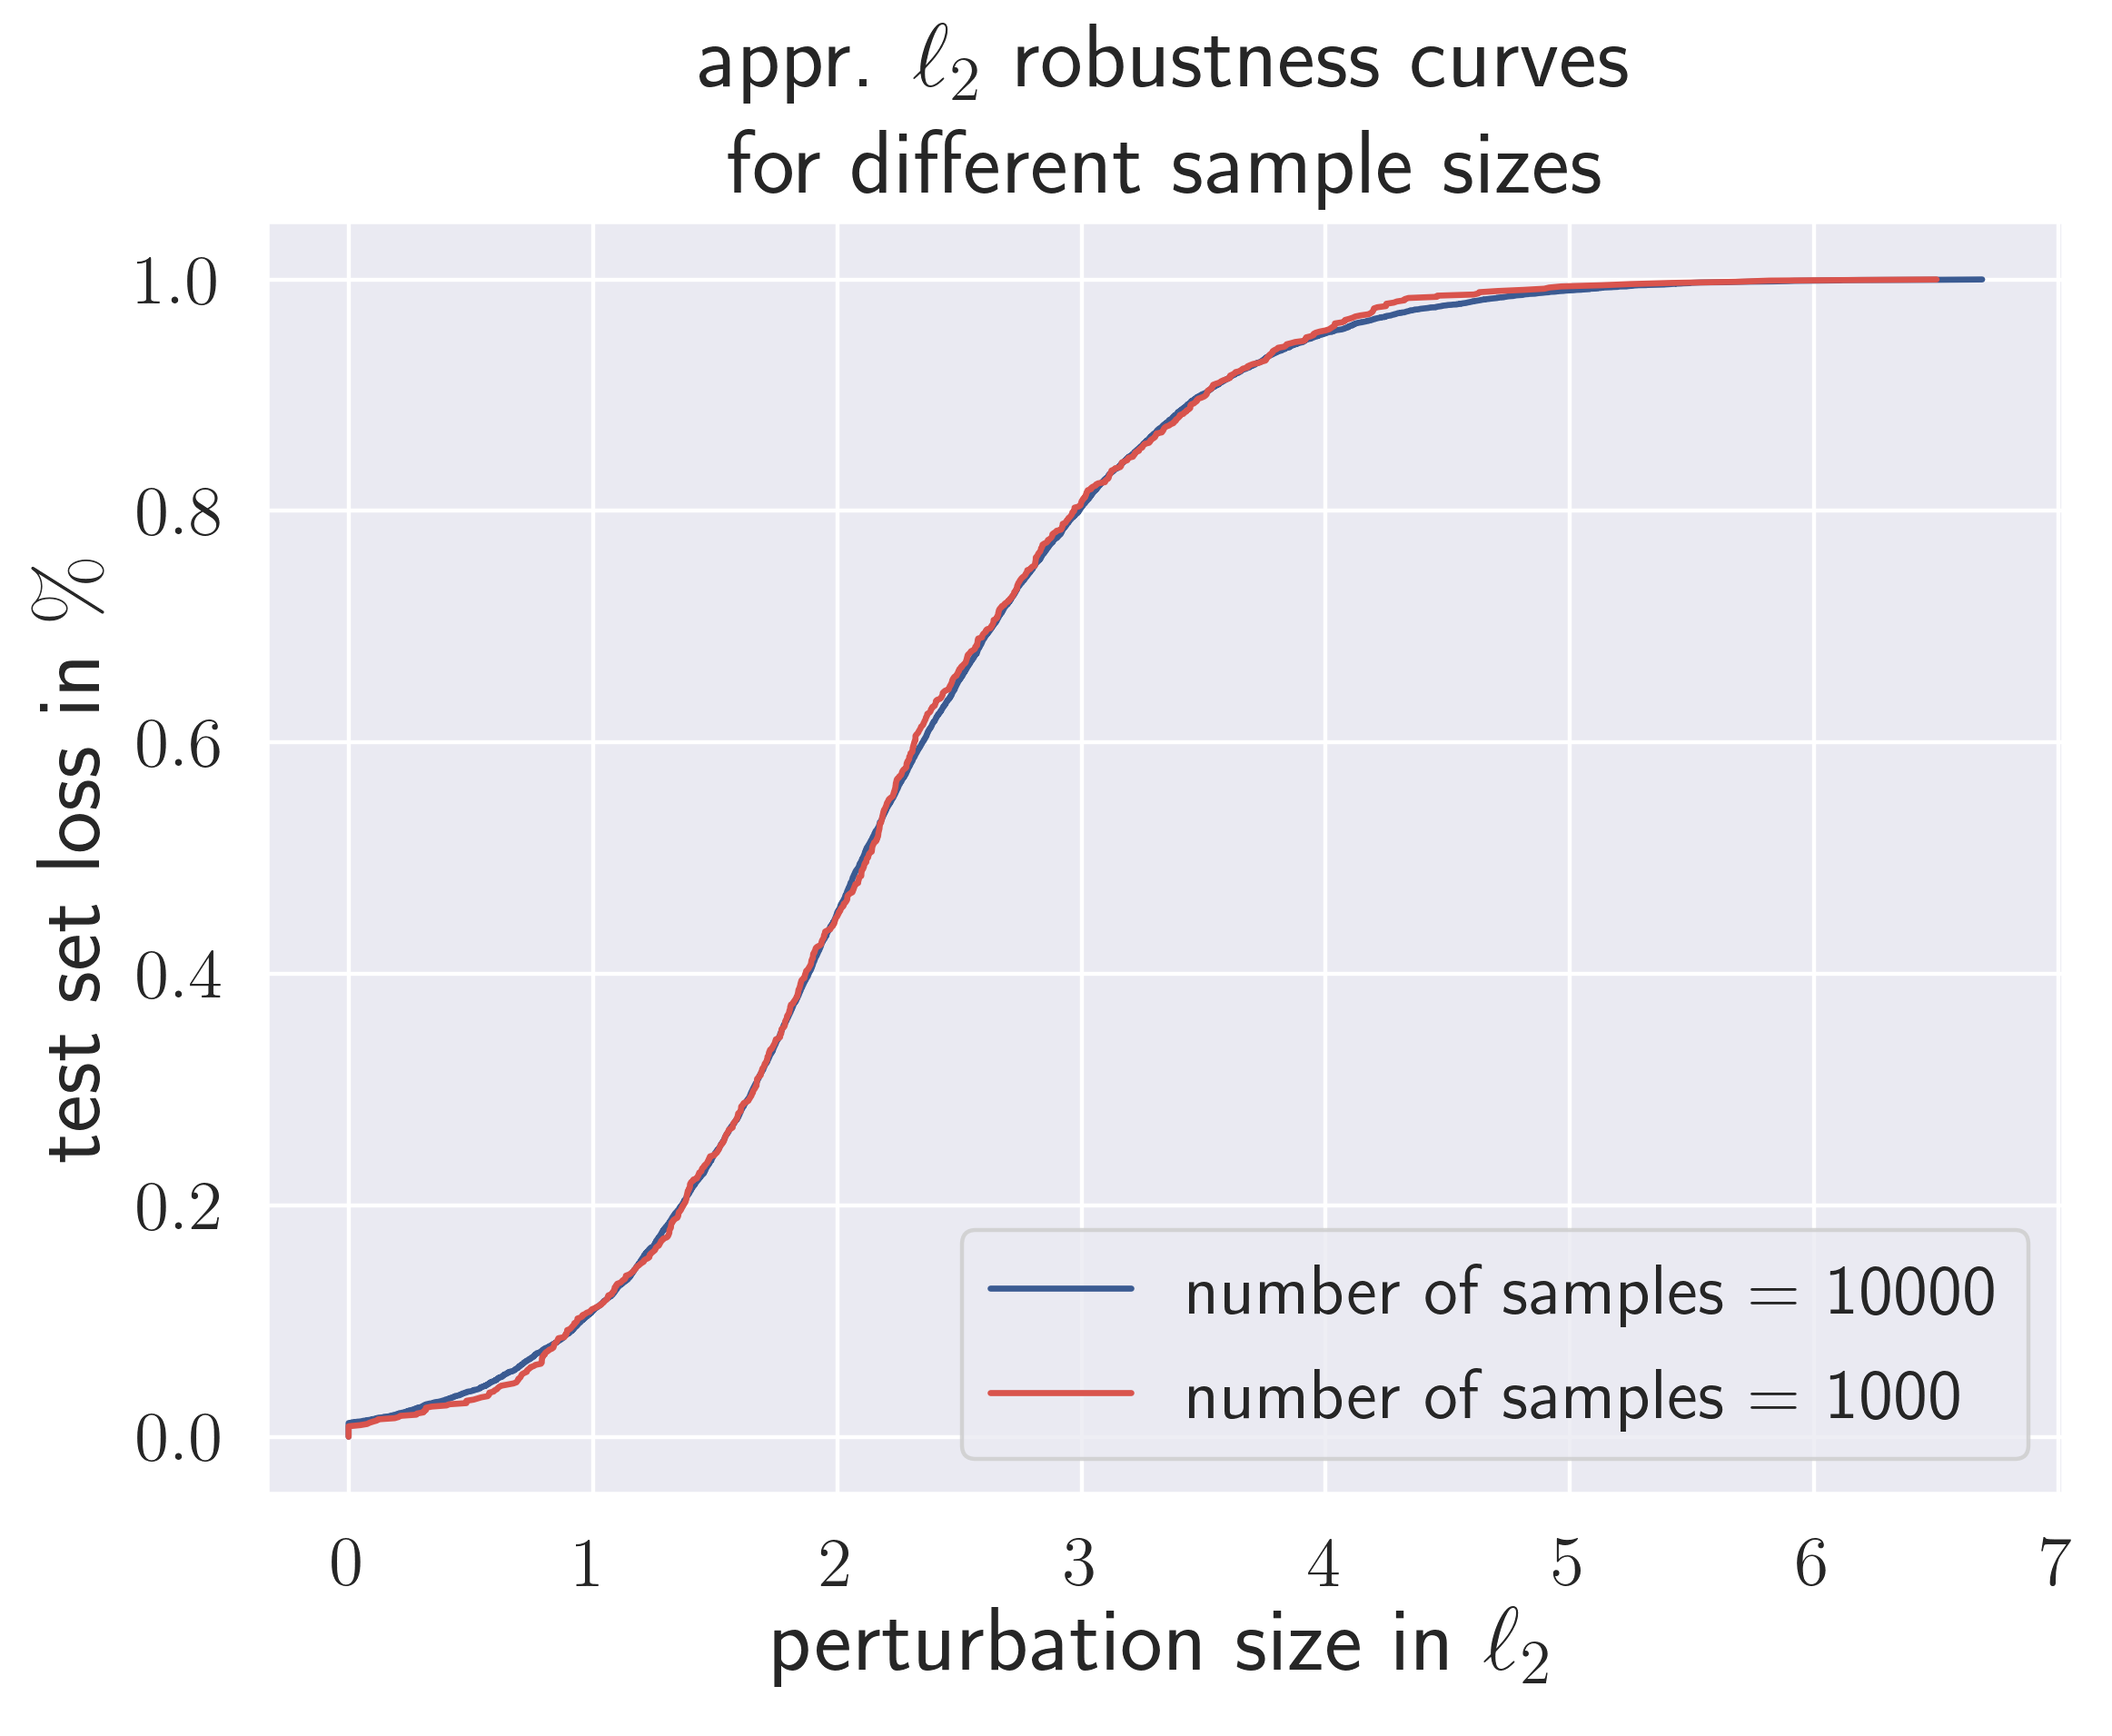

In [8]:
# name to save the plot
save_name = "fig_rc__1k_vs_10k"

tenksample = robustness_curve_data["2"]["x"]
oneksample = np.sort(np.random.choice(robustness_curve_data["2"]["x"], size = 1000))

# number of model types and parameter combinations
n_cols = 1
n_rows = 1

fig, ax = plt.subplots(n_rows,
                       n_cols,
                       figsize=(6 * n_cols, 5 * n_rows),
                       dpi=400)

ax.plot(tenksample,
        np.linspace(0, 1, tenksample.shape[0]),
        c=colors["blue"],
        label="number of samples = 10000")
ax.plot(oneksample,
        np.linspace(0, 1, oneksample.shape[0]),
        c=colors["red"],
        label="number of samples = 1000")
ax.legend()
ax.set_ylabel("test set loss in $\%$")
ax.set_xlabel("perturbation size in $\ell_2$")
ax.set_title("appr. $\ell_2$ robustness curves\nfor different sample sizes")

fig.tight_layout()
fig.savefig('res/{}.pdf'.format(save_name))